## 1) Importações das bibliotecas

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Leitura do arquivo

In [12]:
df_filmes = pd.read_csv('/content/IMDbTopMovies.csv', encoding='latin1')

In [17]:
df_filmes

,Movie Rank,Movie Name,Year of Release,IMDB Rating
0,1,The Godfather,1972,9.2
1,2,Tôkyô monogatari,1953,8.1
2,3,Shichinin no samurai,1954,8.6
3,4,The Godfather Part II,1974,9.0
4,5,Casablanca,1942,8.5
...,...,...,...,...
1995,996,The Thief of Bagdad,1924,7.7
1996,997,Lost in Translation,2003,7.7
1997,998,Ying xiong,2002,7.9
1998,999,Sense and Sensibility,1995,7.7


## 3) Limpeza da base de dados

- Identificar 4 dígitos seguidos
- Remove "TV Movie" e selecionar os 4 últimos dígitos

Removendo todos os caracteres que não sejam dígitos

In [18]:
df_filmes['Year of Release'] = df_filmes['Year of Release'].str.replace(r'\D', '', regex=True)
df_filmes

,Movie Rank,Movie Name,Year of Release,IMDB Rating
0,1,The Godfather,1972,9.2
1,2,Tôkyô monogatari,1953,8.1
2,3,Shichinin no samurai,1954,8.6
3,4,The Godfather Part II,1974,9.0
4,5,Casablanca,1942,8.5
...,...,...,...,...
1995,996,The Thief of Bagdad,1924,7.7
1996,997,Lost in Translation,2003,7.7
1997,998,Ying xiong,2002,7.9
1998,999,Sense and Sensibility,1995,7.7


Para os seriados, adotamos o ano de lançamento, e não o período em que a série estava em produção

In [19]:
df_filmes['Year of Release'] = df_filmes['Year of Release'].str.slice(0,4)
df_filmes

,Movie Rank,Movie Name,Year of Release,IMDB Rating
0,1,The Godfather,1972,9.2
1,2,Tôkyô monogatari,1953,8.1
2,3,Shichinin no samurai,1954,8.6
3,4,The Godfather Part II,1974,9.0
4,5,Casablanca,1942,8.5
...,...,...,...,...
1995,996,The Thief of Bagdad,1924,7.7
1996,997,Lost in Translation,2003,7.7
1997,998,Ying xiong,2002,7.9
1998,999,Sense and Sensibility,1995,7.7


Verificação da coluna "Year of Release" para confirmar que os valores são válidos

In [25]:
df_filmes['Year of Release'] = df_filmes['Year of Release'].astype(int)

In [24]:
df_filmes['Year of Release'].max()

2019

In [23]:
df_filmes['Year of Release'].min()

1902

## 4) Sugestões de Análises

- Quantidade de filmes por range de IMDB Rating (valor absoluto e relativo)
- A média do IMDB por década do filme (IMDB Rating - BoxPlot x Ano)
- Distribuição do IMDB rating (frequência x IMDB rating)
- Quantidade de filmes lançados ano após ano (quantidade x ano)
- Correlação entre ano de lançamento e IMDB Rating
- Os melhores e os piores filmes

### Distribuição do IMDB Rating

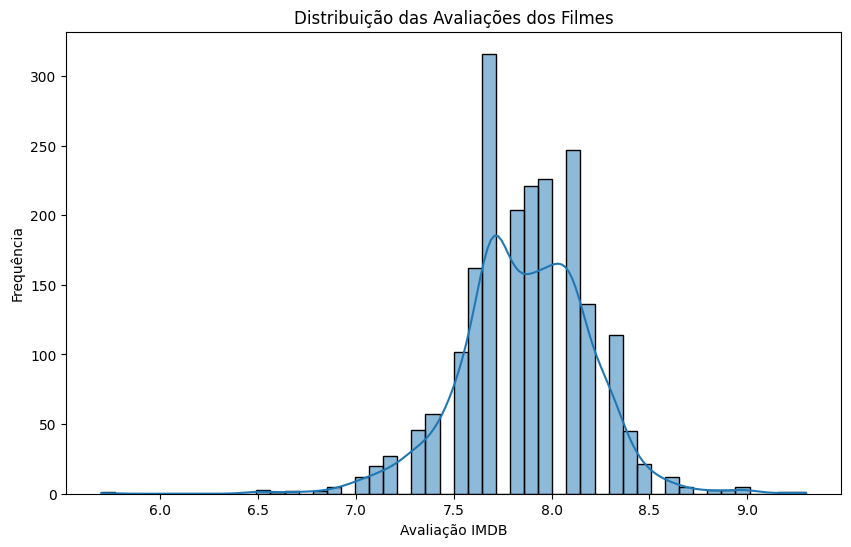

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filmes['IMDB Rating'], bins=50, kde=True)
plt.title('Distribuição das Avaliações dos Filmes')
plt.xlabel('Avaliação IMDB')
plt.ylabel('Frequência')
plt.show()

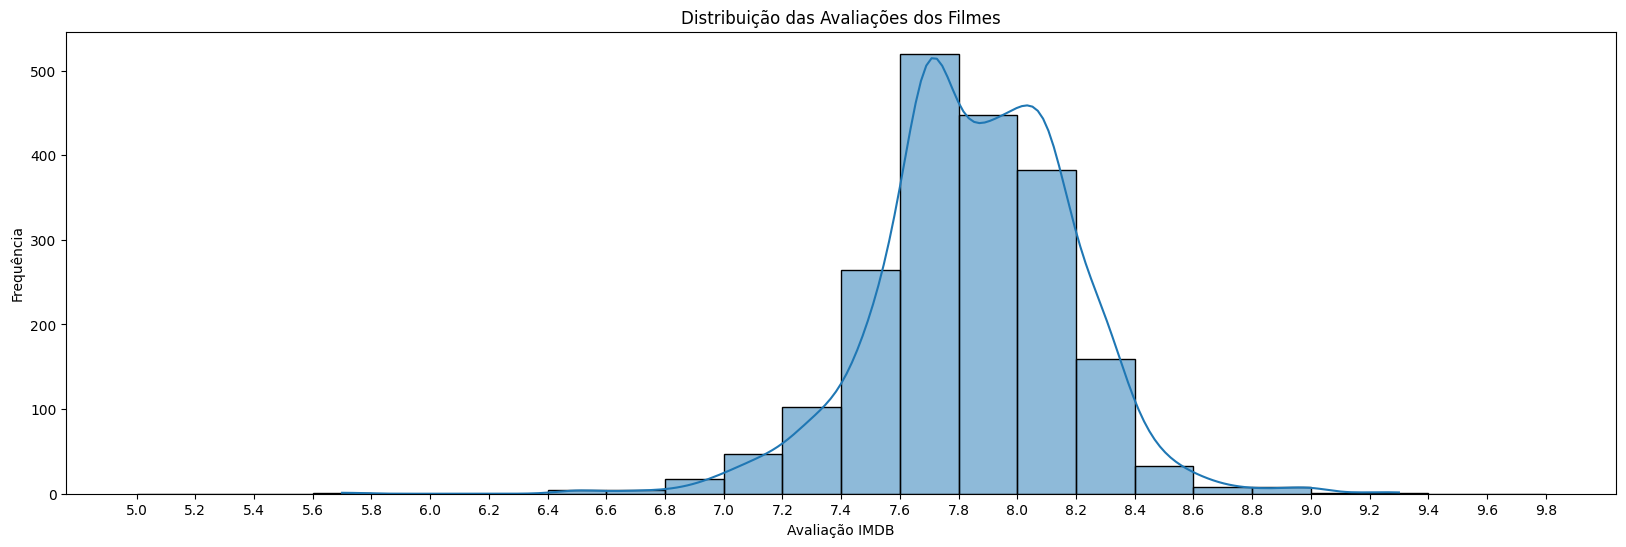

In [46]:
# Definir os intervalos (bins) desejados
bins = np.arange(5.0, 10.0, 0.2)

# 1. Distribuição das Avaliações com intervalos personalizados
plt.figure(figsize=(20, 6))
sns.histplot(df_filmes['IMDB Rating'], bins=bins, kde=True)
plt.title('Distribuição das Avaliações dos Filmes')
plt.xlabel('Avaliação IMDB')
plt.ylabel('Frequência')
plt.xticks(bins)  # Ajustar os ticks do eixo x para mostrar os intervalos definidos
plt.show()

### Número de filmes por ano de lançamento

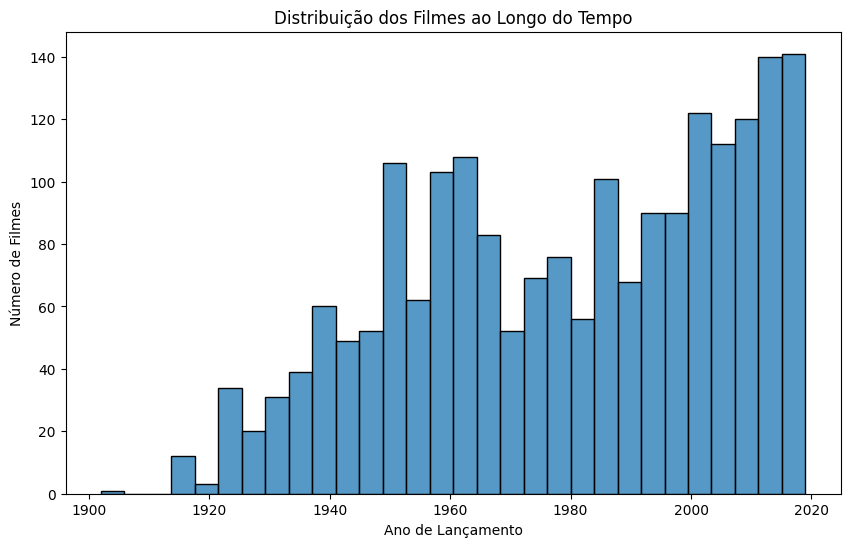

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filmes['Year of Release'], bins=30, kde=False)
plt.title('Distribuição dos Filmes ao Longo do Tempo')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Filmes')
plt.show()

### Relação entre avaliação e ano de lançamento

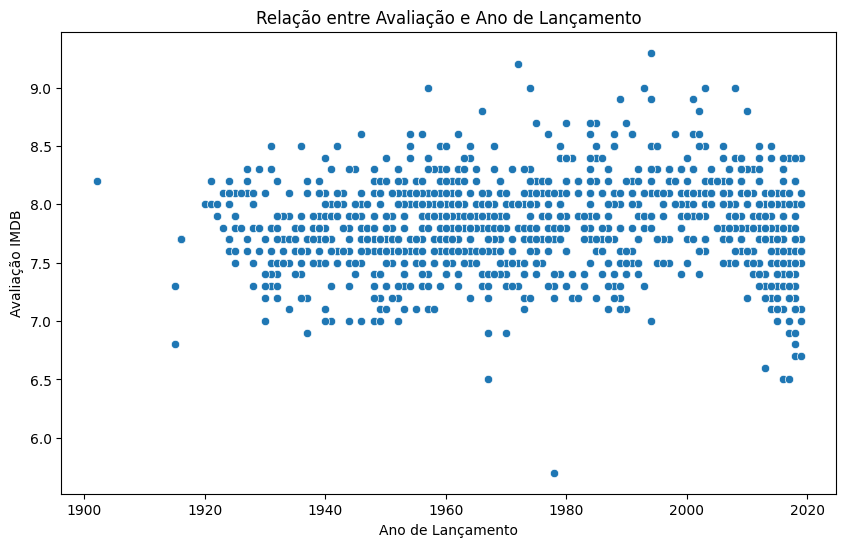

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year of Release', y='IMDB Rating', data=df_filmes)
plt.title('Relação entre Avaliação e Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Avaliação IMDB')
plt.show()

### Média de avaliação dos filmes por década

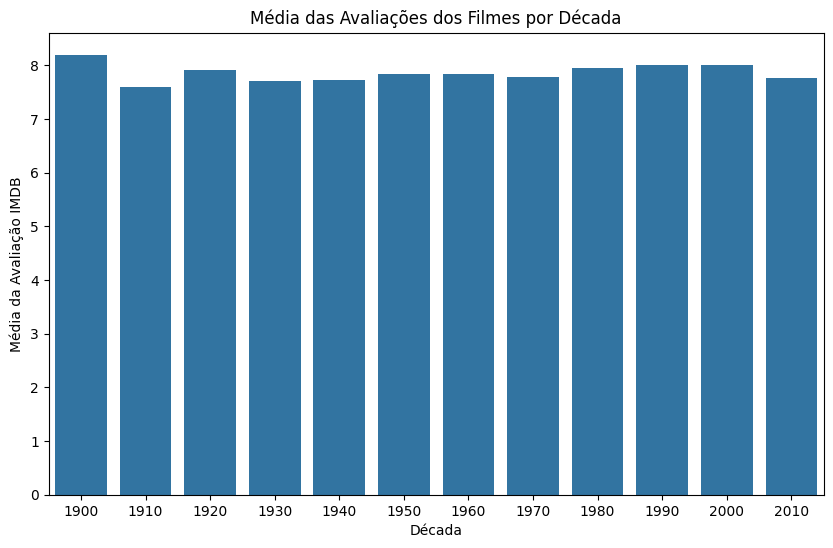

In [49]:
df_filmes['Decade'] = (df_filmes['Year of Release'] // 10) * 10
decade_mean_ratings = df_filmes.groupby('Decade')['IMDB Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Decade', y='IMDB Rating', data=decade_mean_ratings)
plt.title('Média das Avaliações dos Filmes por Década')
plt.xlabel('Década')
plt.ylabel('Média da Avaliação IMDB')
plt.show()

### Melhores Filmes

In [53]:
top_10_rating = df_filmes.nlargest(10, 'IMDB Rating')['IMDB Rating'].min()
top_filmes = df_filmes[df_filmes['IMDB Rating'] >= top_10_rating].sort_values(by='IMDB Rating', ascending=False)
top_filmes_list = top_filmes[['Movie Name', 'Year of Release', 'IMDB Rating']]

# Exibir a lista dos melhores filmes
print("Top Filmes com Avaliação Igual ou Superior ao 10º Filme:")
print(top_filmes_list)

Top Filmes com Avaliação Igual ou Superior ao 10º Filme:
                                            Movie Name  Year of Release  \
235                           The Shawshank Redemption             1994   
0                                        The Godfather             1972   
3                                The Godfather Part II             1974   
7                                         12 Angry Men             1957   
17                                    Schindler's List             1993   
147                                    The Dark Knight             2008   
322      The Lord of the Rings: The Return of the King             2003   
12                                             Dekalog             1989   
13                                        Pulp Fiction             1994   
332  The Lord of the Rings: The Fellowship of the Ring             2001   

     IMDB Rating  
235          9.3  
0            9.2  
3            9.0  
7            9.0  
17           9.0  
147

### Piores Filmes

In [52]:
worst_10_rating = df_filmes.nsmallest(10, 'IMDB Rating')['IMDB Rating'].max()
worst_filmes = df_filmes[df_filmes['IMDB Rating'] <= worst_10_rating].sort_values(by='IMDB Rating')
worst_filmes_list = worst_filmes[['Movie Name', 'Year of Release', 'IMDB Rating']]

# Exibir a lista dos piores filmes
print("\nPiores Filmes com Avaliação Igual ou Inferior ao 10º Filme:")
print(worst_filmes_list)


Piores Filmes com Avaliação Igual ou Inferior ao 10º Filme:
                    Movie Name  Year of Release  IMDB Rating
776              The Big Sleep             1978          5.7
948                    Gavagai             2016          6.5
971      La Telenovela Errante             2017          6.5
997      David Holzman's Diary             1967          6.5
994           Trudno byt bogom             2013          6.6
345  A Bread Factory: Part Two             2018          6.7
456                  The Climb             2019          6.7
438  A Bread Factory: Part One             2018          6.8
965           The Regeneration             1915          6.8
284                    Vuelven             2017          6.9
838                   Week End             1967          6.9
890        Strategia del ragno             1970          6.9
954  Les perles de la couronne             1937          6.9
996             We the Animals             2018          6.9


### Relação entre década e IMDB Rating

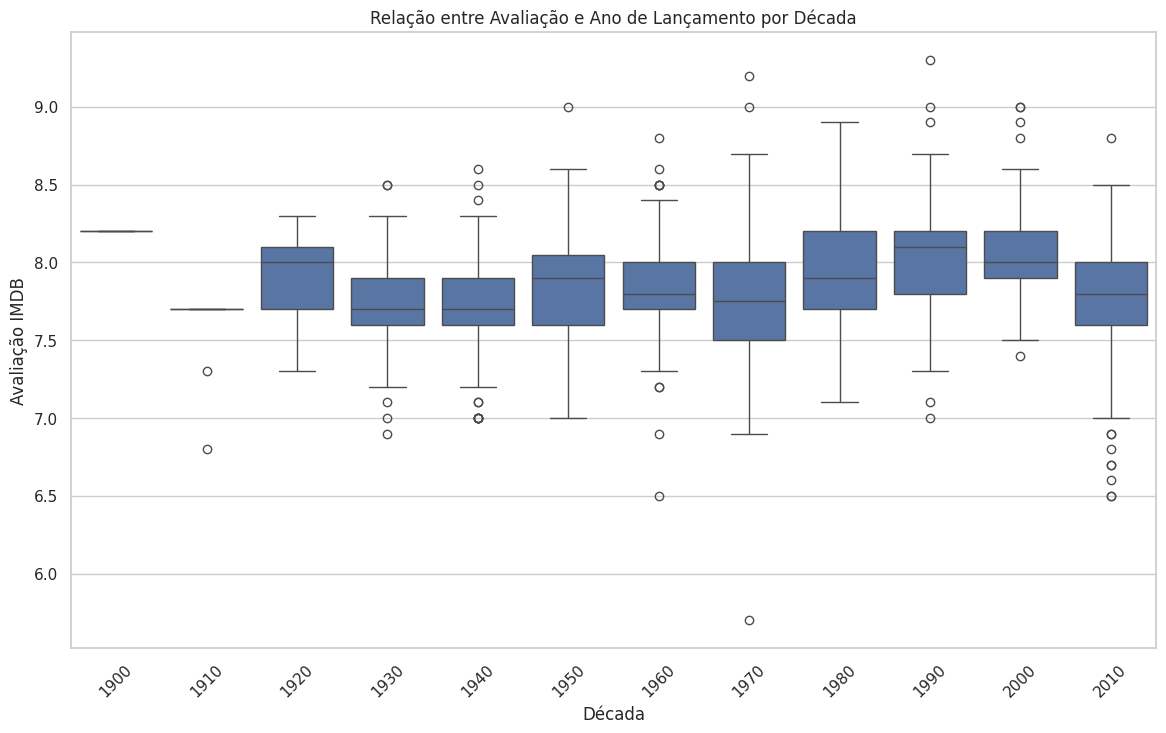

In [55]:
# Criar uma nova coluna para a década
df_filmes['Decade'] = (df_filmes['Year of Release'] // 10) * 10

# Configurar o estilo dos gráficos
sns.set(style='whitegrid')

# Criar o gráfico de boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Decade', y='IMDB Rating', data=df_filmes)
plt.title('Relação entre Avaliação e Ano de Lançamento por Década')
plt.xlabel('Década')
plt.ylabel('Avaliação IMDB')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.show()